# DBSCAN

In [80]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [81]:
# Loading the dataset
df= pd.read_csv("crime_data.csv")

##### Performing EDA

In [82]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [84]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [85]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [86]:
# dropping the column since it is not necessary
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')


### Data Visualization

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


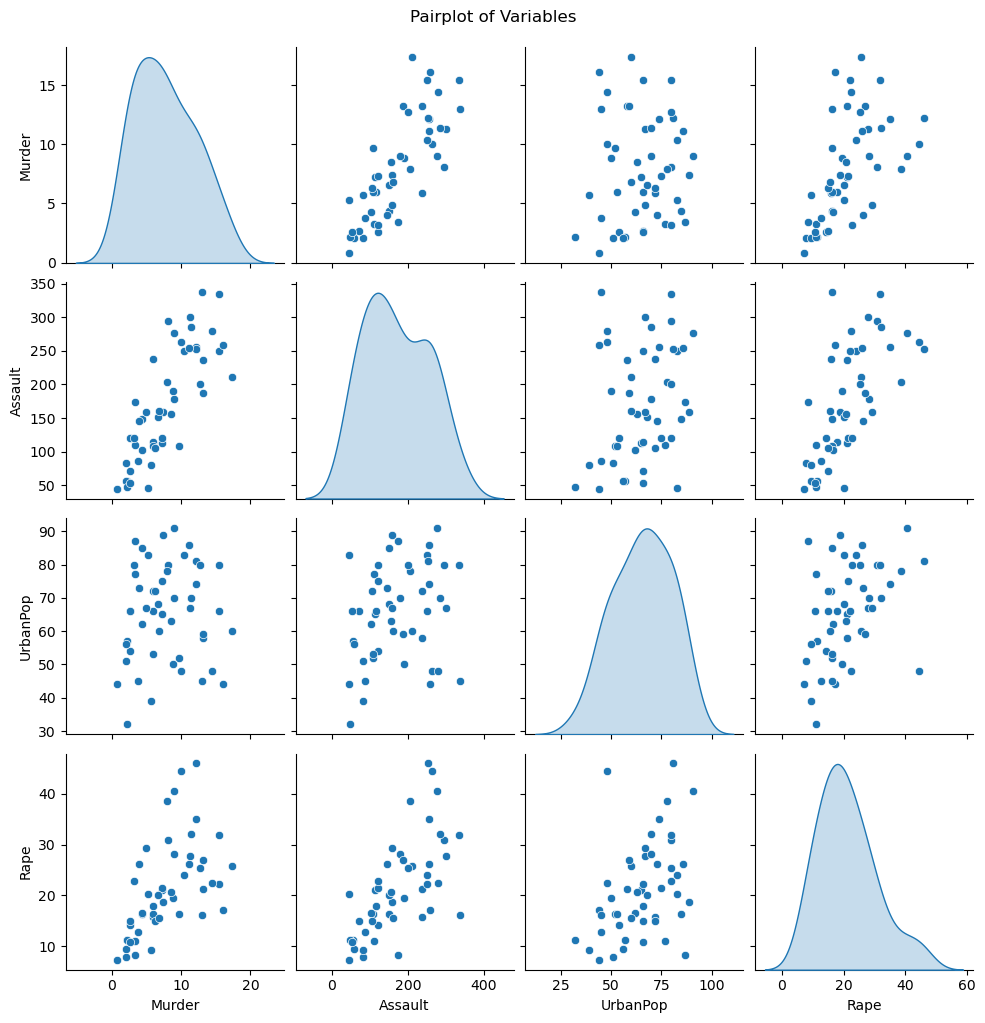

In [142]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

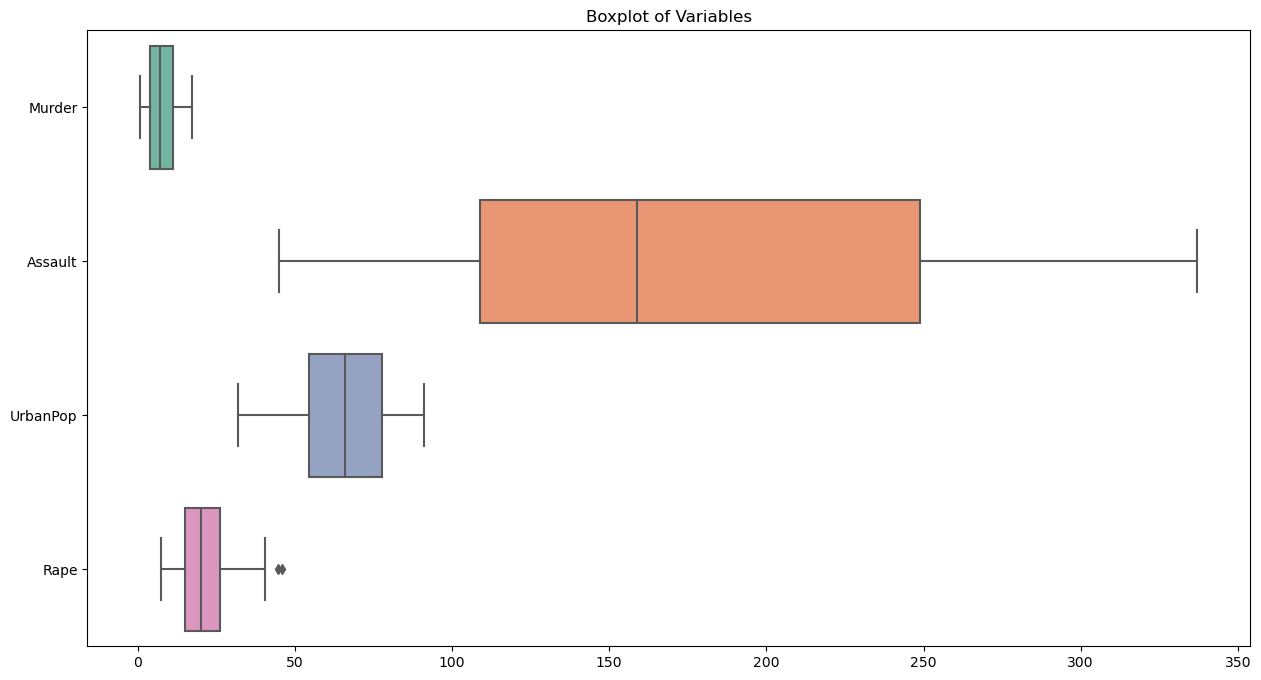

In [140]:
# Boxplot 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title("Boxplot of Variables")
plt.show()

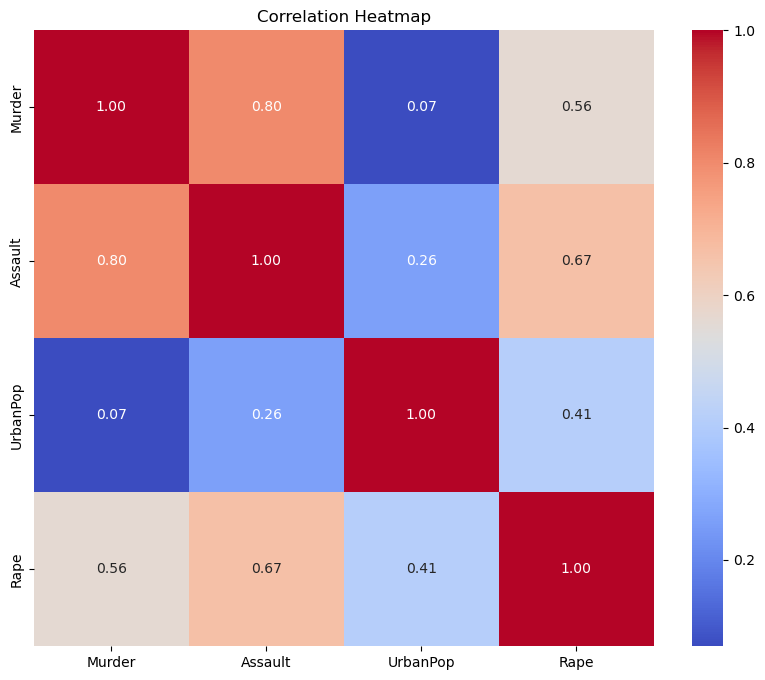

In [141]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [87]:
# converting the values in array format
array = df.values

In [88]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [89]:
# standardizing the data
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [90]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [339]:
# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=2)

In [340]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [341]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [342]:
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [343]:
# concatenating the dataset with cluster column
pd.concat([df,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [344]:
result = pd.concat([df, cl], axis=1)
result.groupby('cluster').agg(['mean']).reset_index()


,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.560,243.500000,70.800000,30.430000
1,0,14.950,237.000000,55.833333,22.616667
2,1,4.825,112.035714,63.357143,16.107143
3,2,11.400,234.666667,83.000000,25.200000
4,3,11.600,280.000000,70.333333,31.666667


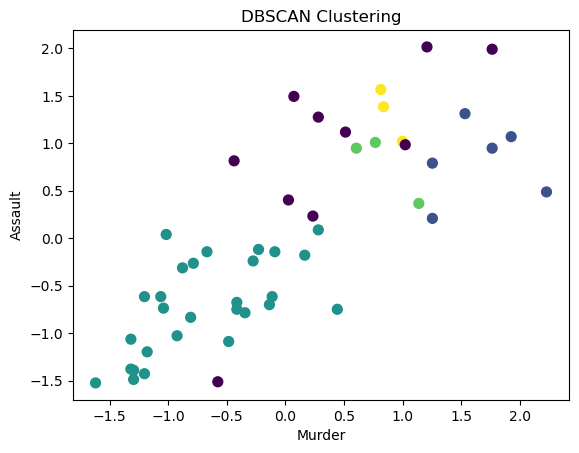

In [345]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

Cluster Sizes:
cluster
 1    28
-1    10
 0     6
 2     3
 3     3
Name: count, dtype: int64


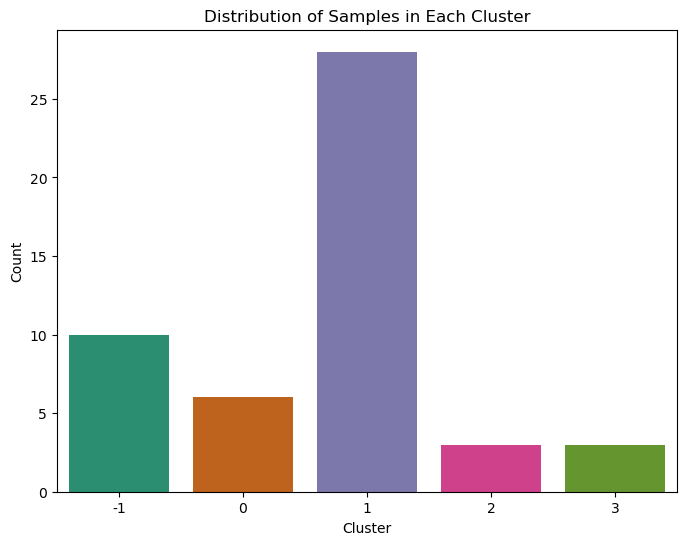

In [346]:
import seaborn as sns
cluster_sizes = result['cluster'].value_counts()

print("Cluster Sizes:")
print(cluster_sizes)

# Visualize the distribution of samples in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=result, palette='Dark2')
plt.title('Distribution of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [347]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.19290975823254836


In [348]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = calinski_harabasz_score(X, dbscan.labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Calinski-Harabasz Index: 11.528334509643669
